# Capstone project 2

# We are going to predect the price of Bitcoin using LSTM method

Lets import necessary libary

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

let's load our present data for prediction ( The data has been taken from the Web side 'WWW.twelvedata.com')

In [2]:
api_key='3aa545146899454d82aa265635a8a193'
symbel='UTC/USD'
interval = '5min'
order = 'asc'
start_date='2023-02-01 00:00:00'
end_date='2023-03-01 00:00:00'
api_url=f'https://api.twelvedata.com/time_series?symbol={symbel}&start_data={start_date}&end_date={end_date}&interval={interval}&order={order}&apikey={api_key}'

In [3]:
data = requests.get(api_url).json()
data_final=pd.DataFrame(data['values'])
data_final

,datetime,open,high,low,close
0,2023-02-11 13:40:00,0.00870,0.00870,0.00870,0.00870
1,2023-02-11 13:45:00,0.00870,0.00871,0.00870,0.00870
2,2023-02-11 13:50:00,0.00870,0.00870,0.00870,0.00870
3,2023-02-11 13:55:00,0.00870,0.00870,0.00870,0.00870
4,2023-02-11 14:00:00,0.00870,0.00870,0.00870,0.00870
...,...,...,...,...,...
4995,2023-02-28 23:40:00,0.00926,0.00926,0.00925,0.00925
4996,2023-02-28 23:45:00,0.00925,0.00926,0.00925,0.00925
4997,2023-02-28 23:50:00,0.00925,0.00926,0.00925,0.00926
4998,2023-02-28 23:55:00,0.00925,0.00925,0.00925,0.00925


In [4]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data_final['close'].values.reshape(-1,1))

In [5]:
time_intervals_to_train=24
prediction_interval=12

x_train=[]
y_train=[]

In [6]:
for i in range(time_intervals_to_train, len(scaled_data) - prediction_interval):
  x_train.append(scaled_data[i - time_intervals_to_train:i, 0])
  y_train.append(scaled_data[i + prediction_interval, 0])

x_train = np.array(x_train)
y_train=np.array(y_train) 

In [7]:
x_train.shape

(4964, 24)

In [8]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [9]:
x_train.shape

(4964, 24, 1)

Let's apply LSTM for the model

In [10]:
model = Sequential()


model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1),activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(64,return_sequences=True,activation='relu'))
model.add(Dropout(0.3))
model.add(LSTM(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
78/78 [==============================] - 23s 165ms/step - loss: 0.0241 - accuracy: 8.0580e-04
Epoch 2/10
78/78 [==============================] - 13s 172ms/step - loss: 0.0034 - accuracy: 8.0580e-04
Epoch 3/10
78/78 [==============================] - 15s 190ms/step - loss: 0.0032 - accuracy: 8.0580e-04
Epoch 4/10
78/78 [==============================] - 18s 226ms/step - loss: 0.0030 - accuracy: 8.0580e-04
Epoch 5/10
78/78 [==============================] - 14s 185ms/step - loss: 0.0030 - accuracy: 8.0580e-04
Epoch 6/10
78/78 [==============================] - 16s 201ms/step - loss: 0.0028 - accuracy: 8.0580e-04
Epoch 7/10
78/78 [==============================] - 15s 192ms/step - loss: 0.0027 - accuracy: 8.0580e-04
Epoch 8/10
78/78 [==============================] - 14s 181ms/step - loss: 0.0027 - accuracy: 8.0580e-04
Epoch 9/10
78/78 [==============================] - 19s 244ms/step - loss: 0.0027 - accuracy: 8.0580e-04
Epoch 10/10
78/78 [==============================] - 16

Lets test our model

In [13]:
test_start='2023-02-22 00:00:00'
test_end='2023-02-25 00:00:00'

test_api_url=f'https://api.twelvedata.com/time_series?symbol={symbel}&start_data={test_start}&end_date={test_end}&interval={interval}&order={order}&apikey={api_key}'
test_data = requests.get(test_api_url).json()
test_data_final = pd.DataFrame(test_data['values'])
test_data_final

,datetime,open,high,low,close
0,2023-02-07 12:45:00,0.00920,0.00921,0.00920,0.00921
1,2023-02-07 12:50:00,0.00920,0.00920,0.00920,0.00920
2,2023-02-07 12:55:00,0.00921,0.00921,0.00921,0.00921
3,2023-02-07 13:00:00,0.00921,0.00921,0.00921,0.00921
4,2023-02-07 13:05:00,0.00921,0.00921,0.00920,0.00920
...,...,...,...,...,...
4995,2023-02-24 23:40:00,0.00927,0.00927,0.00927,0.00927
4996,2023-02-24 23:45:00,0.00926,0.00928,0.00926,0.00928
4997,2023-02-24 23:50:00,0.00927,0.00928,0.00927,0.00928
4998,2023-02-24 23:55:00,0.00928,0.00928,0.00927,0.00928


In [14]:
test_data_final['close']

0       0.00921
1       0.00920
2       0.00921
3       0.00921
4       0.00920
         ...   
4995    0.00927
4996    0.00928
4997    0.00928
4998    0.00928
4999    0.00927
Name: close, Length: 5000, dtype: object

In [15]:
pd.to_numeric (test_data_final['close'],errors='coerce')

0       0.00921
1       0.00920
2       0.00921
3       0.00921
4       0.00920
         ...   
4995    0.00927
4996    0.00928
4997    0.00928
4998    0.00928
4999    0.00927
Name: close, Length: 5000, dtype: float64

In [16]:
bitcoin_prices = pd.to_numeric (test_data_final['close'],errors='coerce').values

test_inputs =  test_data_final['close'].values
test_inputs = test_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(test_inputs)

In [17]:
x_test = []

for x in range(time_intervals_to_train,len(model_inputs)):
  x_test.append(model_inputs[x - time_intervals_to_train:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
x_test.shape

(4976, 24, 1)

In [19]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

156/156 [==============================] - 8s 39ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

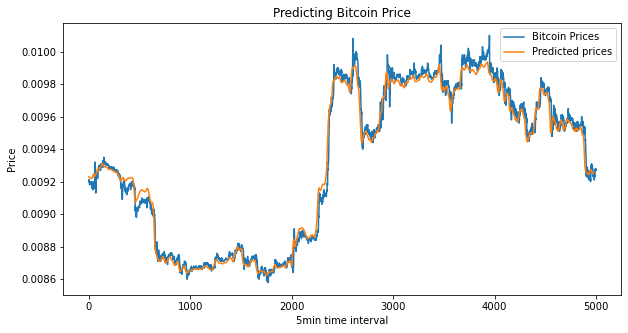

In [20]:
plt.figure(figsize=(10,5))
plt.plot(bitcoin_prices, label = 'Bitcoin Prices')
plt.plot(prediction_prices, label='Predicted prices')
plt.title('Predicting Bitcoin Price')
plt.xlabel('5min time interval')
plt.ylabel('Price')
plt.legend()
plt.show

In the observation of the above graph we come to know that the **predicted value and actual value are almost closer**, So we conclude that the model has a good accuracy.

Lets predit what whould be price after 5 min

In [21]:
last_data = model_inputs[len(model_inputs)+1 - time_intervals_to_train : len(model_inputs)+1,0]
last_data = np.array(last_data)

In [22]:
last_data.shape

(23,)

In [23]:
last_data = np.reshape(last_data, (1, last_data.shape[0], 1))

In [24]:
prediction = model.predict(last_data)

1/1 [==============================] - 1s 1s/step


In [25]:
prediction = scaler.inverse_transform(prediction)

In [26]:
prediction

array([[0.00925819]], dtype=float32)

We come to know that price of the bitcoin price after 5 min